In [1]:
#imports
import gzip
import math
import json
import random
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_name = 'Dataset/renttherunway_final_data.json'
df = pd.read_json(dir_name, lines=True)

In [3]:
df['fit'].value_counts()/len(df)

fit      0.737795
small    0.133886
large    0.128319
Name: fit, dtype: float64

In [4]:
df['weight'] = df['weight'].apply(lambda x: int(x[:-3]) if not pd.isnull(x) else -1)

df['date'] = pd.to_datetime(df['review_date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

In [32]:
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,date,year,month
0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",2016-04-20,2016,4
1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",2013-06-18,2013,6
2,fit,360448,NaN,1063761,-1,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",2015-12-14,2015,12
3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",2014-02-12,2014,2
4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",2016-09-26,2016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",2016-05-18,2016,5
192540,fit,118398,32c,682043,100,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",2016-09-30,2016,9
192541,fit,47002,36a,683251,135,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",2016-03-04,2016,3
192542,fit,961120,36c,126335,165,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",2015-11-25,2015,11


In [4]:
df['bust size'].value_counts()

34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: bust size, Length: 106, dtype: int64

# Graphs 

### Category Variation with Time

In [ ]:
years = [x for x in sorted(df['year'].unique())[1:]

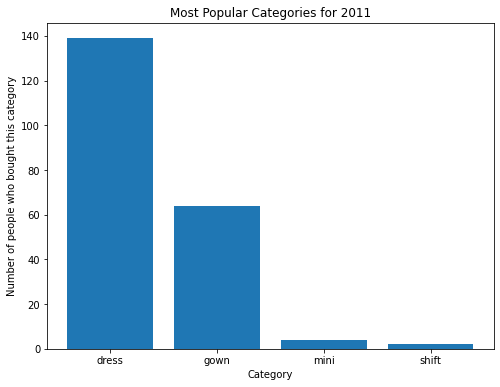

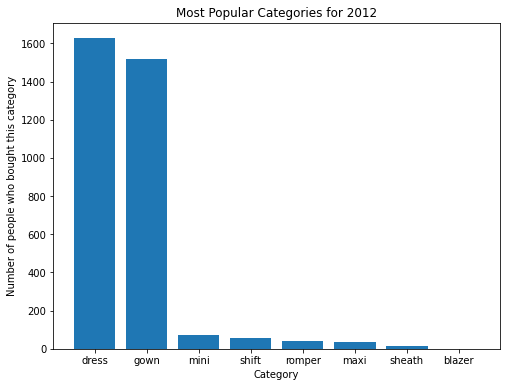

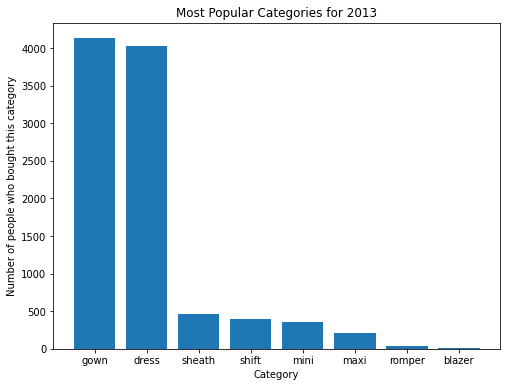

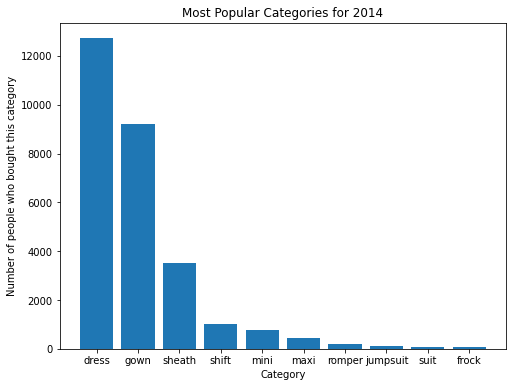

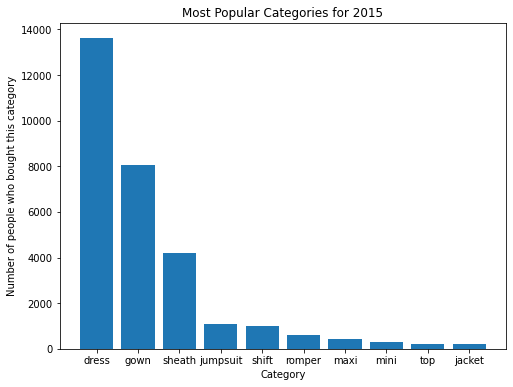

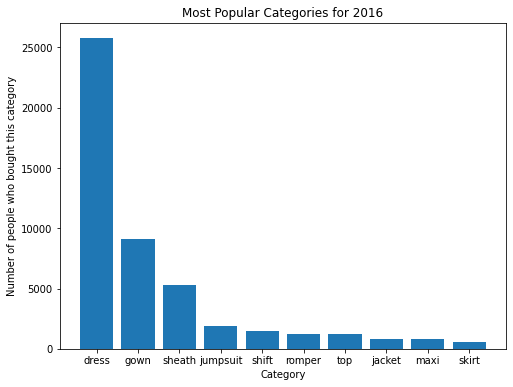

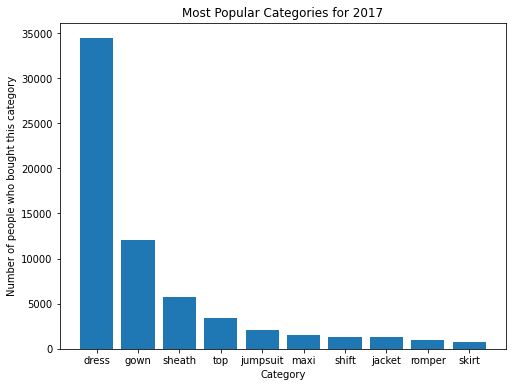

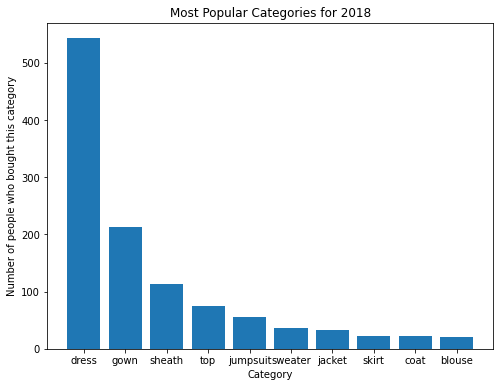

In [72]:
for year in sorted(df['year'].unique())[1:]:
    
    plt.figure(figsize=(8, 6))
    #create pie chart
    plt.title('Most Popular Categories for {}'.format(year))
    
    df_temp = df[df['year'] == year]
    
    xpos = [x for x in range(0, len(df_temp['category'].value_counts()[:10]))]
    plt.bar(x= xpos , height = df_temp['category'].value_counts()[:10].values)
    plt.xticks(xpos, df_temp['category'].value_counts()[:10].keys())
    plt.xlabel('Category')
    plt.ylabel('Number of people who bought this category')
    plt.show()

#### Fit

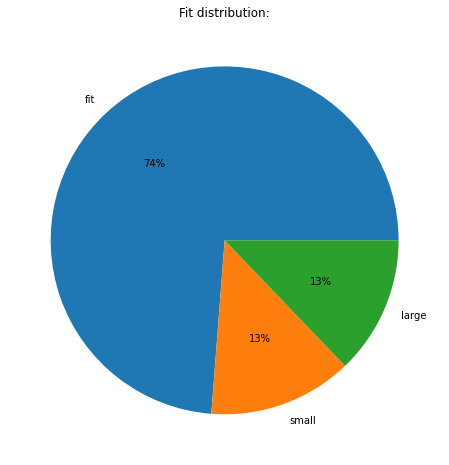

In [12]:
#define Seaborn color palette to use
plt.figure(figsize=(10, 8))
#create pie chart
plt.title('Fit distribution:')
plt.pie(x =df['fit'].value_counts().values, labels = df['fit'].value_counts().keys(), autopct='%.0f%%')
plt.show()

#### weight

In [14]:
bins = []
start = 26
for x in range(10):
    bins.append('{} - {}'.format(start, start+ 24))
    start +=25
    
    if start == max(df['weight'].value_counts().keys()[1:]):
        break

In [15]:
bin_values = {}
for b in bins:
    low_num = int(b[:b.find('-')])
    high_num = int(b[b.find('-')+1:])
    bin_values[b] = len(df[(df['weight'] >= low_num) & (df['weight'] <= high_num) & (df['weight'] != -1)])

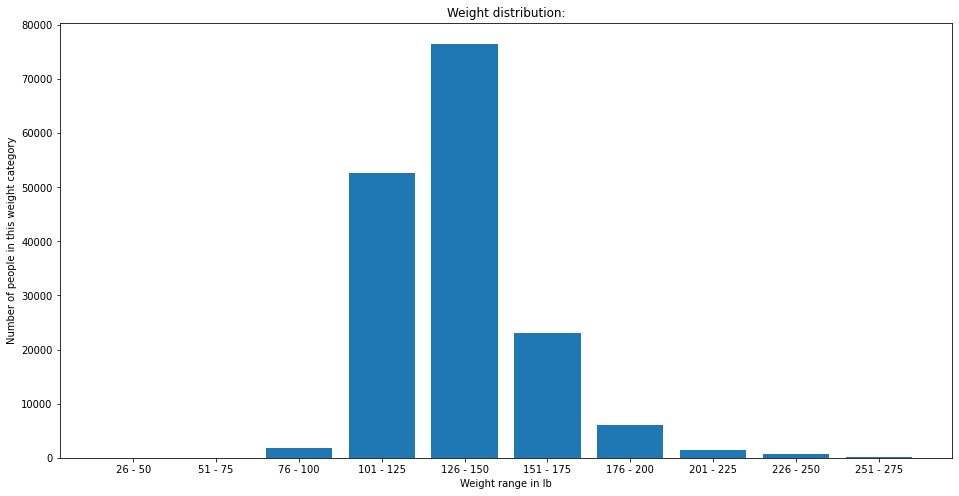

In [34]:
plt.figure(figsize=(16, 8))
plt.title('Weight distribution:')
xpos = [x for x in range(0, len(bin_values))]
plt.bar(x= xpos , height = bin_values.values())
plt.xticks(xpos, bin_values.keys())
plt.xlabel('Weight range in lb')
plt.ylabel('Number of people in this weight category')
plt.show()


#### Rating Distribution

In [36]:
df['rating'].value_counts()

10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
Name: rating, dtype: int64

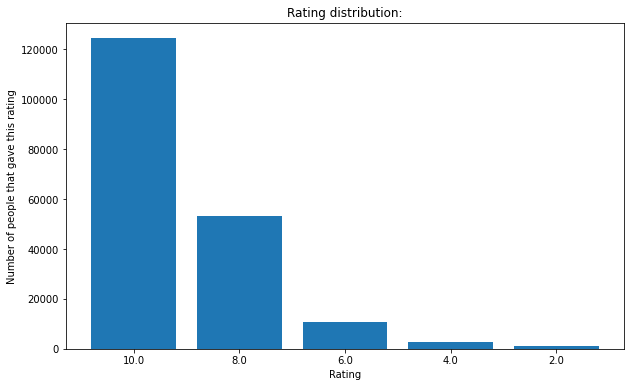

In [40]:
plt.figure(figsize=(10, 6))
plt.title('Rating distribution:')
xpos = [x for x in range(0, len(df['rating'].value_counts()))]
plt.bar(x= xpos , height = df['rating'].value_counts().values)
plt.xticks(xpos, df['rating'].value_counts().keys())
plt.xlabel('Rating')
plt.ylabel('Number of people that gave this rating')
plt.show()

#### Rented for distribution 

In [41]:
df['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

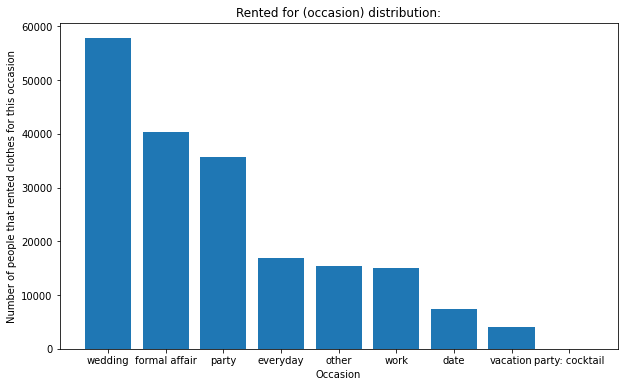

In [43]:
plt.figure(figsize=(10, 6))
plt.title('Rented for (occasion) distribution:')
xpos = [x for x in range(0, len(df['rented for'].value_counts()))]
plt.bar(x= xpos , height = df['rented for'].value_counts().values)
plt.xticks(xpos, df['rented for'].value_counts().keys())
plt.xlabel('Occasion')
plt.ylabel('Number of people that rented clothes for this occasion')
plt.show()

#### Body Type distribution

In [44]:
df['body type'].value_counts()

hourglass            55349
athletic             43667
pear                 22135
petite               22131
full bust            15006
straight & narrow    14742
apple                 4877
Name: body type, dtype: int64

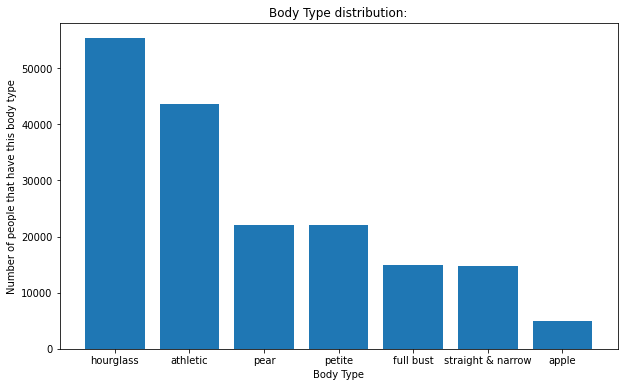

In [45]:
plt.figure(figsize=(10, 6))
plt.title('Body Type distribution:')
xpos = [x for x in range(0, len(df['body type'].value_counts()))]
plt.bar(x= xpos , height = df['body type'].value_counts().values)
plt.xticks(xpos, df['body type'].value_counts().keys())
plt.xlabel('Body Type')
plt.ylabel('Number of people that have this body type')
plt.show()

#### Category Distribution 

In [46]:
df['category'].value_counts()

dress         92884
gown          44381
sheath        19316
shift          5365
jumpsuit       5184
              ...  
caftan            4
overcoat          2
sweatpants        2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

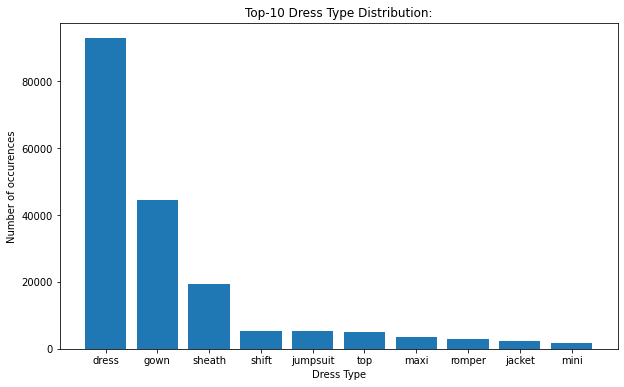

In [52]:
plt.figure(figsize=(10, 6))
plt.title('Top-10 Dress Type Distribution:')
xpos = [x for x in range(0, 10)]
plt.bar(x= xpos , height = df['category'].value_counts()[:10].values)
plt.xticks(xpos, df['category'].value_counts()[:10].keys())
plt.xlabel('Dress Type')
plt.ylabel('Number of occurences')
plt.show()

In [ ]:
# knn imputation
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df)

In [ ]:
df['rented for'].value_counts()

In [84]:
y = df['fit']

In [86]:
y.to_csv('Y_all.csv', encoding='utf-8', index=False)

In [ ]:
df = df.drop('fit', 1)

In [97]:
sizes = df['bust size'].value_counts().keys()
counts = df['bust size'].value_counts().values

In [ ]:
df_bust = pd.DataFrame()

In [ ]:
counts